# QUBO Graphs

Quadratic unconstrained binary optimization (QUBO) is a family of cambinotorial optimizations problems that can be solved using specific type of specilized quantum computers using a method using quantum anealing. I recently learned about them and was pleasently surprised to find that the problem is commonly represented as a graph. The graph representation given was not satisfictory to me and the problem kept nagging me. So, here is a quick way of representing the problem as a graph that makes "sense" (at least to me) and can be solved using traditional graph theory methods. 

### QUBO Optimization
Simply put, the QUBO problem attempts to optimize the values of a vector `x` with binary elements (zero/ones or ones/negative ones) such that the following function yeilds a minimum value. Note that the formula has linear (solitary) terms and quadratic (interaction terms). This is important for the graph representation later on.

$O = \sum_{i=1}^{n}{c_ix_i} + \sum_{i=1}^{n}\sum_{j=1}^{n}{q_{ij}}x_ix_j$

Note that the graph is undirected.

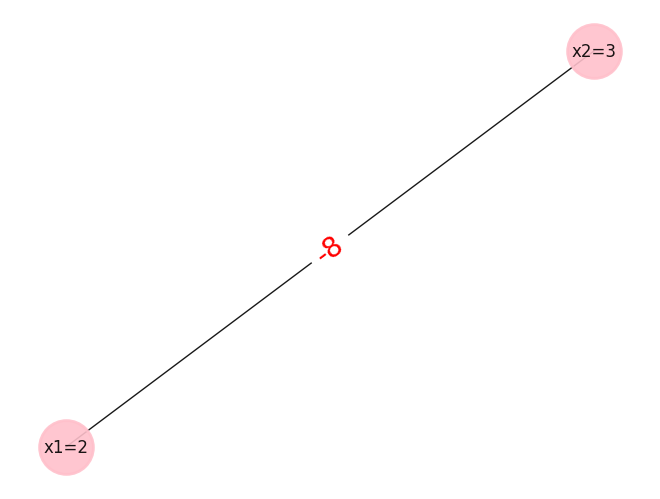

In [136]:
import numpy as np
import networkx as nx

# Define the coefficients (user input)
c = {"x1": 2, "x2":3}
q = {("x1", "x2"):-8}

# Create graph
G = nx.Graph()
G.add_nodes_from(list(c.keys()), attr={"weight":c.values()})
G.add_edges_from(list(q.keys()), attr={"weight":q.values()})

# Visualize graph
pos = nx.spring_layout(G)

nx.draw(
    G, pos, edge_color='black', width=1, linewidths=2,
    node_size=1500, node_color='pink', alpha=0.9,
    labels={k:f"{k}={v}" for k,v in c.items()}
)

nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=q,
    font_color='red',
    font_size=20
);

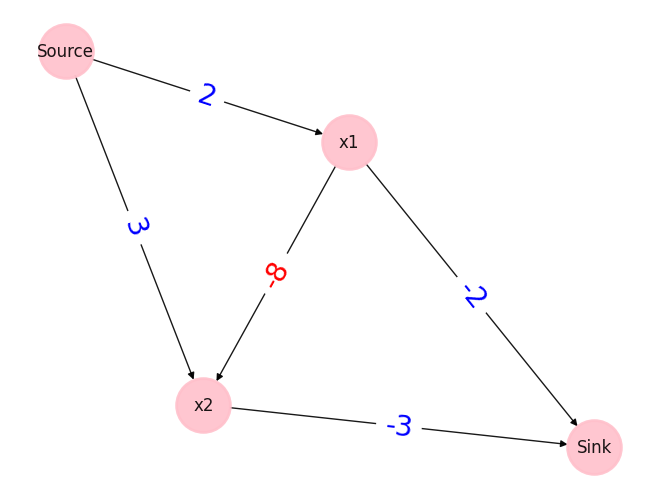

In [139]:

# Create new edges from
ss = {}
for node, weight in c.items():
    ss[("Source", node)] = weight
    ss[(node, "Sink")] = -weight

q_prime = {(d,s):w for (s,d), w in q.items()}


# Create the nodes
G = nx.DiGraph()
G.add_node("Source")
G.add_node("Sink")
G.add_nodes_from(c.keys())

# Create the edges
G.add_edges_from(list(q.keys()), attr={"weight":q.values()})
# G.add_edges_from(list(q_prime.keys()), attr={"weight":q_prime.values()})
G.add_edges_from(list(ss.keys()), attr={"weight":ss.values()})

# Draw
pos = nx.spring_layout(G)

nx.draw(
    G, pos, edge_color='black', width=1, linewidths=2,
    node_size=1500, node_color='pink', alpha=0.9,
    labels={node: node for node in G.nodes()}
)

nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=q,
    font_color='red',
    font_size=20
)


nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=ss,
    font_color='blue',
    font_size=20
);

In [140]:
nx.maximum_flow(G, 'Source', 'Sink')

NetworkXUnbounded: Infinite capacity path, flow unbounded above.

In [132]:
q_prime = {(d,s):w for (s,d), w in q.items()}
q_prime

{('x2', 'x1'): 8}